In [2]:
#list of libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import numpy as np

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:


# Load the CSV file into a DataFrame
df = pd.read_csv('dataset.csv', delimiter = ',')

<h1 style="text-align: left;">Part 1: Dataset Understanding, Exploration, and Processing</h1>



In [54]:
df.shape

(1296675, 24)

In [55]:
#The dataset it too wide to display in one table, so we will split them into froups of 6 columns
# Define groups of columns
group1 = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt']
group2 = ['first', 'last', 'gender', 'street', 'city', 'state']
group3 = ['zip', 'lat', 'long', 'city_pop', 'job', 'dob']
group4 = ['trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode']

# Display each group of columns
display(df[group1].head())
display(df[group2].head())
display(df[group3].head())
display(df[group4].head())


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96


,first,last,gender,street,city,state
0,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC
1,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA
2,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID
3,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT
4,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA


,zip,lat,long,city_pop,job,dob
0,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09
1,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21
2,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19
3,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12
4,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28


,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


<h1 style="text-align: left;">List of Features</h1>

- **Unnamed: 0**: An unnamed column, often an index column from the original data source. This may not be useful for analysis and could be dropped.

- **trans_date_trans_time**: Transaction date and time, indicating when each transaction occurred. Useful for time-based analysis, such as detecting peak transaction times or seasonal trends.

- **cc_num**: Credit card number, a unique identifier for each credit card. Useful to identify individual customer transactions and analyze behavior patterns for specific cards.

- **merchant**: The merchant where the transaction took place. This helps in analyzing spending patterns with specific merchants or types of merchants.

- **category**: Transaction category (e.g., groceries, entertainment). Useful for categorizing expenses and understanding customer spending habits by category.

- **amt**: Amount of the transaction. Critical for financial analysis, such as total spending, average transaction value, and identifying potentially fraudulent high-value transactions.

- **first** and **last**: First and last names of the customer. Generally not used directly in analysis but could help in combining or verifying unique customer records.

- **gender**: Customer gender. Useful for demographic analysis, helping to identify spending patterns or trends across different genders.

- **street**, **city**, **state**, **zip**: Address-related information for the customer. These could help in geographic analysis, understanding regional trends, or targeting location-based services.

- **lat** and **long**: Latitude and longitude coordinates. Useful for precise geographic mapping and location-based analysis, such as determining the distance of transactions from the customer’s residence.

- **city_pop**: Population of the city where the customer lives. This provides context for urban vs. rural spending patterns and regional economic analysis.

- **job**: Customer's job title. Useful for socio-economic analysis, which can reveal trends in spending across different job types or income levels.

- **dob**: Date of birth of the customer. Useful for calculating age, which allows for age-based segmentation and trend analysis.

- **trans_num**: Unique transaction identifier. Helps in uniquely identifying each transaction, useful for tracking transaction history.

- **unix_time**: Transaction timestamp in UNIX format. Similar to `trans_date_trans_time`, but in a machine-friendly format for precise time-based analysis.

- **merch_lat** and **merch_long**: Latitude and longitude of the merchant location. Useful for spatial analysis, such as detecting high-frequency merchant locations or distances between transactions.

- **is_fraud**: Indicator of whether the transaction was fraudulent. This is critical for fraud detection and risk analysis.

- **merch_zipcode**: Zip code of the merchant. Useful for location-based analysis and can help in identifying high-risk or high-transaction areas.

Each of these features provides unique insights into customer behavior, transaction patterns, and potential fraud detection. In analysis, certain features like **amount**, **category**, and **is_fraud** will be directly relevant, while others such as **location** and **time** features add context for deeper insights.


In [52]:
import pandas as pd



# Create an empty list to hold the summary data
summary_data = []

# Loop through each column to get the necessary information
for column in df.columns:
    feature = column
    missing_values = df[column].isnull().sum()
    unique_values = df[column].nunique()
    duplicates = df.duplicated(subset=[column]).sum()
    data_type = df[column].dtype
    
    # Append the data for each feature as a dictionary
    summary_data.append({
        'Feature': feature,
        'Missing Values': missing_values,
        'Unique Values': unique_values,
        'Data Type': data_type
    })

# Convert the list of dictionaries into a new DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame
summary_df


,Feature,Missing Values,Unique Values,Data Type
0,Unnamed: 0,0,1296675,int64
1,trans_date_trans_time,0,1274791,object
2,cc_num,0,983,int64
3,merchant,0,693,object
4,category,0,14,object
5,amt,0,52928,float64
6,first,0,352,object
7,last,0,481,object
8,gender,0,2,object
9,street,0,983,object


**There are few insights we can get from this table:**
- We have only 983 credit card number, therefore a maximum of 983 clients only, assuming each client has one credit card only.
- Some columns are not useful for our analysis, so it is better to just drop them from the dataset
These columns are ('Unnamed', 'trans_num', 'unix_time','merch_lat','merch_long', 'merch_zipcode') because they have too many unique values which does not add to the our analysis but rather obstruct it.
- We will also drop some of the geographical features ('street','city','zip','state') and rely on coordinates. Moreover, we can calculate the distance between the coordinates of the transaction and that of the merchant
- Also, we will use transaction time to create three more columns
- Credit card number could be used to create a new column for the banking network used for the transaction (visa, mastercard, etc)
- dob (date of birth) column can be used to calculate and create a new column 'age'.


In [4]:
def get_card_network(cc_num):
    cc_num_str = str(cc_num)
    if cc_num_str.startswith('4'):
        return 'Visa'
    elif cc_num_str[:2] in ['51', '52', '53', '54', '55'] or 2221 <= int(cc_num_str[:4]) <= 2720:
        return 'Mastercard'
    elif cc_num_str[:2] in ['34', '37']:
        return 'American Express'
    elif cc_num_str.startswith('6011') or cc_num_str.startswith('65') or 644 <= int(cc_num_str[:3]) <= 649:
        return 'Discover'
    elif cc_num_str[:2] == '36' or 300 <= int(cc_num_str[:3]) <= 305:
        return 'Diners Club'
    elif cc_num_str[:2] == '35':
        return 'JCB'
    else:
        return 'Unknown'

# Apply the function to create a new 'network' column
df['network'] = df['cc_num'].apply(get_card_network)

# Create new columns for day, month, and hour
# Convert 'trans_date_trans_time' to DateTime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract time information to create new features
df['year'] = df['trans_date_trans_time'].dt.year
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day


# Creating the age column
df['dob'] = pd.to_datetime(df['dob'])
df['birth_year'] = df['dob'].dt.year
df['age'] = df['year'] - df['birth_year']
df = df.drop(columns=['dob', 'birth_year'])

# Calculating the distance between the transaction and the merchant


# dropping unnecessary features
df.drop(columns=['Unnamed: 0','trans_date_trans_time', 'trans_num', 'merch_zipcode'
                 ,'street','city','state','zip','first','last','unix_time','cc_num'], 
        inplace=True)
# A statistical Analysis for the numerical values
pd.options.display.float_format = '{:.2f}'.format

display(df.describe())

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,year,hour,day,age
count,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00
mean,70.35,38.54,-90.23,88824.44,38.54,-90.23,0.01,2019.29,12.80,15.59,46.03
std,160.32,5.08,13.76,301956.36,5.11,13.77,0.08,0.45,6.82,8.83,17.38
min,1.00,20.03,-165.67,23.00,19.03,-166.67,0.00,2019.00,0.00,1.00,14.00
25%,9.65,34.62,-96.80,743.00,34.73,-96.90,0.00,2019.00,7.00,8.00,33.00
50%,47.52,39.35,-87.48,2456.00,39.37,-87.44,0.00,2019.00,14.00,15.00,44.00
75%,83.14,41.94,-80.16,20328.00,41.96,-80.24,0.00,2020.00,19.00,23.00,57.00
max,28948.90,66.69,-67.95,2906700.00,67.51,-66.95,1.00,2020.00,23.00,31.00,96.00


In [14]:
# A statistical analysis for the categorical values
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Create a summary for categorical data including most and least frequent values
cat_summary = pd.DataFrame({
    'Unique Values': df[categorical_cols].nunique(),
    'Most Frequent Value': df[categorical_cols].mode().iloc[0],
    'Frequency of Most Frequent': df[categorical_cols].apply(lambda x: x.value_counts().iloc[0]),
    'Percentage of Most Frequent': df[categorical_cols].apply(lambda x: f"{100 * x.value_counts().iloc[0] / len(x):.2f}%"),
    'Least Frequent Value': df[categorical_cols].apply(lambda x: x.value_counts().idxmin()),
    'Frequency of Least Frequent': df[categorical_cols].apply(lambda x: x.value_counts().min()),
    'Percentage of Least Frequent': df[categorical_cols].apply(lambda x: f"{100 * x.value_counts().min() / len(x):.2f}%")
})

display(cat_summary)



,Unique Values,Most Frequent Value,Frequency of Most Frequent,Percentage of Most Frequent,Least Frequent Value,Frequency of Least Frequent,Percentage of Least Frequent
merchant,693,fraud_Kilback LLC,4403,0.34%,"fraud_Hahn, Douglas and Schowalter",727,0.06%
category,14,gas_transport,131659,10.15%,travel,40507,3.12%
gender,2,F,709863,54.74%,M,586812,45.26%
job,494,Film/video editor,9779,0.75%,Ship broker,7,0.00%
network,7,Visa,418825,32.30%,Mastercard,96565,7.45%


In [7]:
# some errors occured during the plots segment,but we fixed them.

# first: make sure that seaborn version is update using the following code:
# !pip install --upgrade seaborn

# Second: numpy version should be 1.21, beause the jupyter version i am using is old  
# pip install numpy==1.21

#Third: it might just be faster to upload the file to google collab if you wish to run it smoothly, 
# as it can automatically detect these kinds of errors and deal with them without much confusion

<ipython-input-16-dea212c9ebc0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_fraud', data=df, palette='viridis')


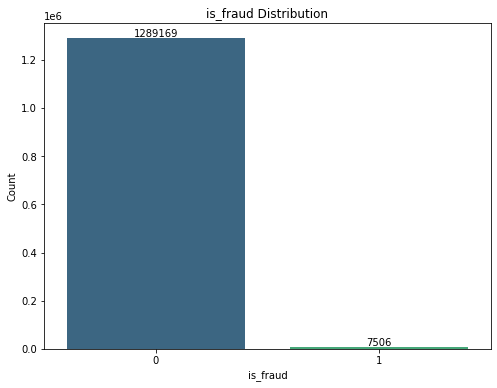

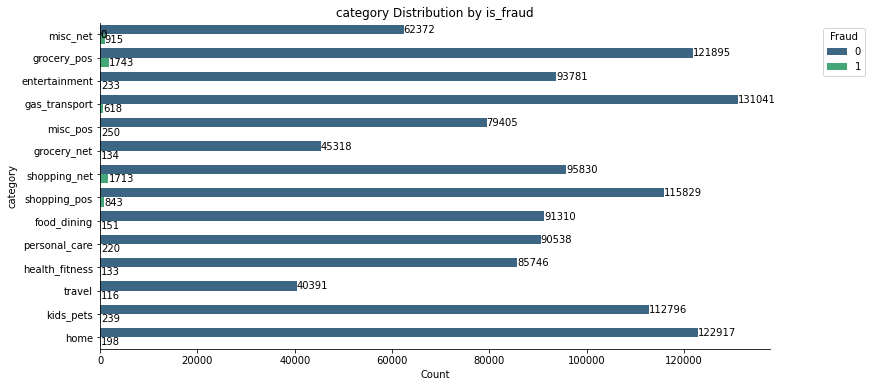

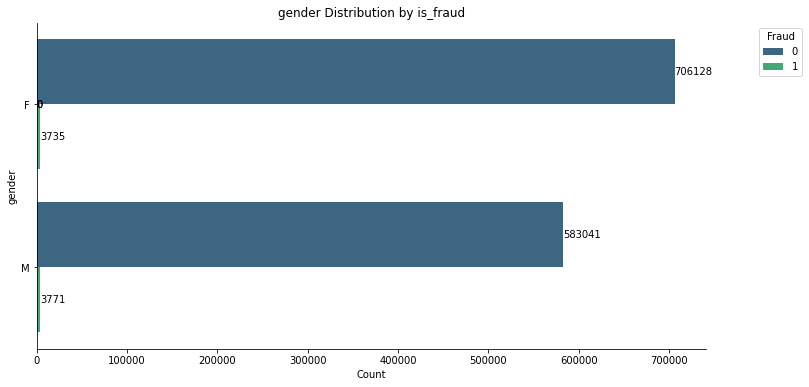

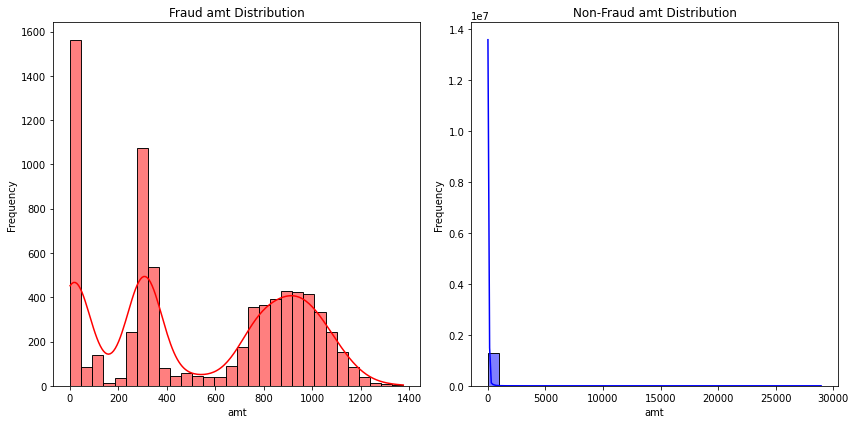

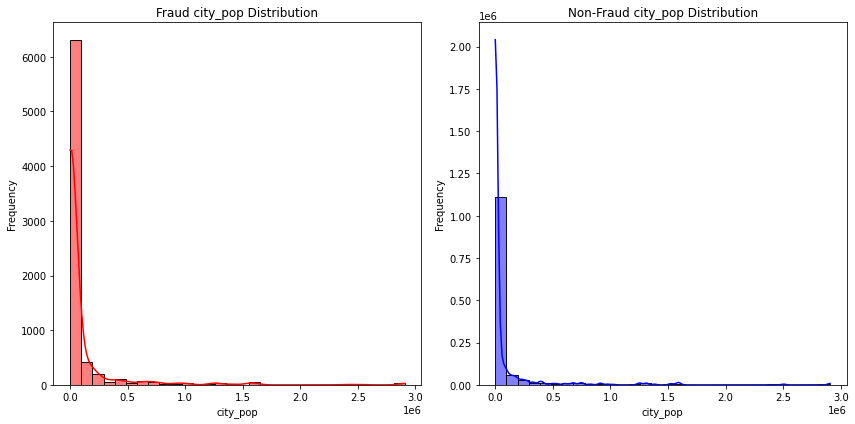

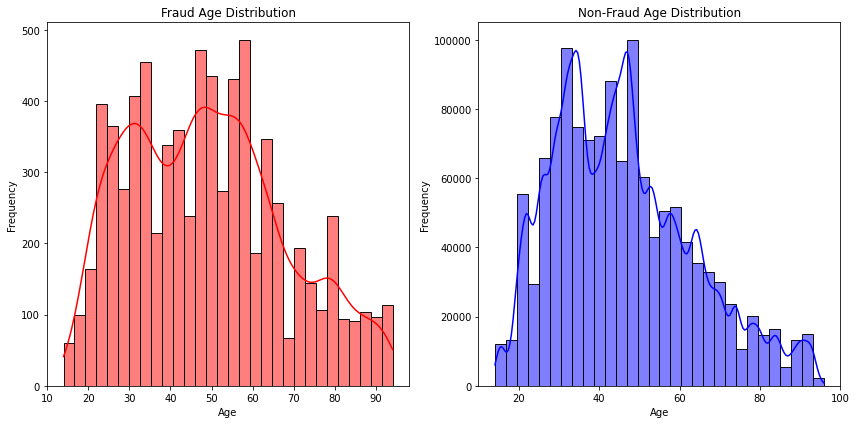

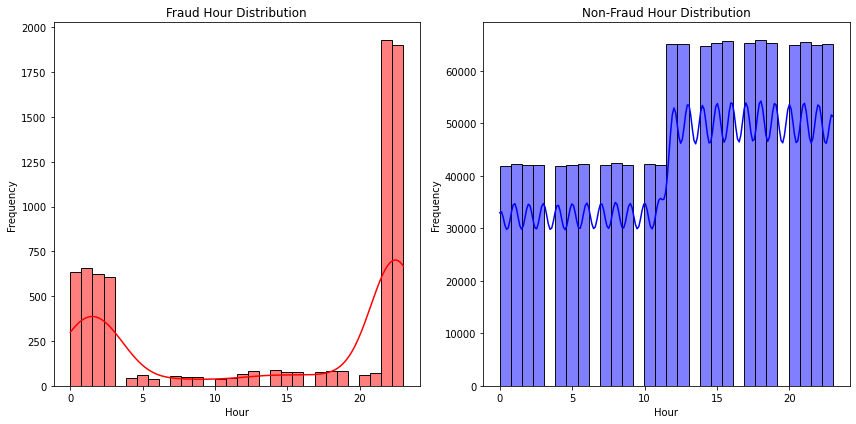

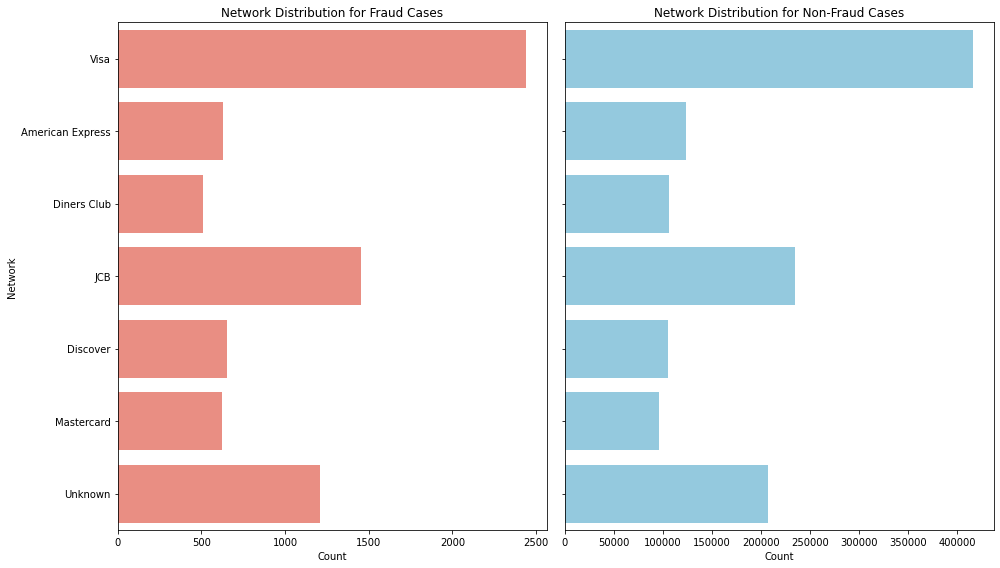

In [16]:
# 1- Fraud count
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_fraud', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color='black')
plt.title('is_fraud Distribution')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()
# 2- gender & category distribution vs fraud
categorical_columns = ['category', 'gender']

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(y=column, hue='is_fraud', data=df, palette='viridis')
    plt.title(f'{column} Distribution by is_fraud')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.legend(title='Fraud', loc='upper right', bbox_to_anchor=(1.15, 1))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 10, p.get_y() + p.get_height() / 2, 
                f'{int(width)}', 
                ha='left', va='center')

    plt.show()
# 3- amt & city_pop  distribution vs is_fraud
numeric_columns = ['amt', 'city_pop']

for column in numeric_columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[df['is_fraud'] == 1][column], bins=30, kde=True, color='red')
    plt.title(f'Fraud {column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(df[df['is_fraud'] == 0][column], bins=30, kde=True, color='blue')
    plt.title(f'Non-Fraud {column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
# 4- Age and hour distribution 
# Define the features you want to plot
numeric_columns = ['age', 'hour']

# Loop through each feature and create the histograms
for column in numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # Plot for fraud cases
    plt.subplot(1, 2, 1)
    sns.histplot(df[df['is_fraud'] == 1][column], bins=30, kde=True, color='red')
    plt.title(f'Fraud {column.capitalize()} Distribution')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    
    # Plot for non-fraud cases
    plt.subplot(1, 2, 2)
    sns.histplot(df[df['is_fraud'] == 0][column], bins=30, kde=True, color='blue')
    plt.title(f'Non-Fraud {column.capitalize()} Distribution')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# 5- network distribution against is_fraud
# Define the categorical column
column = 'network'

# Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

# Plot for fraud cases (is_fraud = 1)
sns.countplot(y=column, data=df[df['is_fraud'] == 1], ax=axes[0], color='salmon')
axes[0].set_title(f'{column.capitalize()} Distribution for Fraud Cases')
axes[0].set_xlabel('Count')
axes[0].set_ylabel(column.capitalize())

# Plot for non-fraud cases (is_fraud = 0)
sns.countplot(y=column, data=df[df['is_fraud'] == 0], ax=axes[1], color='skyblue')
axes[1].set_title(f'{column.capitalize()} Distribution for Non-Fraud Cases')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')  # Remove the y-axis label for the second plot for a cleaner look

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


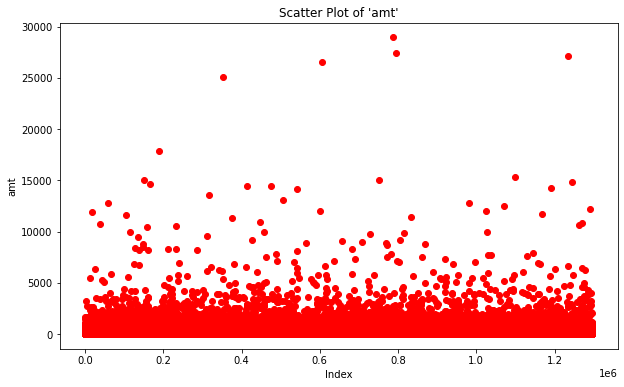

In [5]:
plt.figure(figsize=(10, 6))  
plt.scatter(df.index, df['amt'], color='red') 
plt.title("Scatter Plot of 'amt'")  
plt.xlabel('Index')  
plt.ylabel('amt')  
plt.show()  

we can see that the data is densely condensated under the threshold of 2500-3000, so we will set a threshold of 2700, and anything beyond it will be considered an outlier and be removed

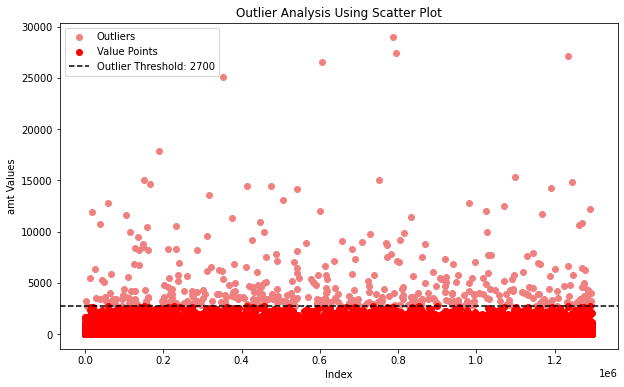

Number of outliers: 430
Outlier percentage: % 0.033161740605780164


In [15]:
outlier_threshold = 2700
outliers = df['amt'] > outlier_threshold
outlier_count = np.count_nonzero(outliers)
total_count = len(df)
outlier_percentage = (outlier_count / total_count) * 100

plt.figure(figsize=(10, 6))
plt.scatter(df.index[outliers], df['amt'][outliers], color='lightcoral', label='Outliers')
plt.scatter(df.index[~outliers], df['amt'][~outliers], color='red', label='Value Points')
plt.axhline(y=outlier_threshold, color='black', linestyle='--', label=f'Outlier Threshold: {outlier_threshold}')
plt.title('Outlier Analysis Using Scatter Plot')
plt.xlabel('Index')
plt.ylabel('amt Values')
plt.legend()
plt.show()


print(f'Number of outliers: {outlier_count}')
print(f'Outlier percentage: % {outlier_percentage}')

In [18]:
# Create a new DataFrame with rows where 'amt' is less than 2700
dfn = df[df['amt'] < 2700]



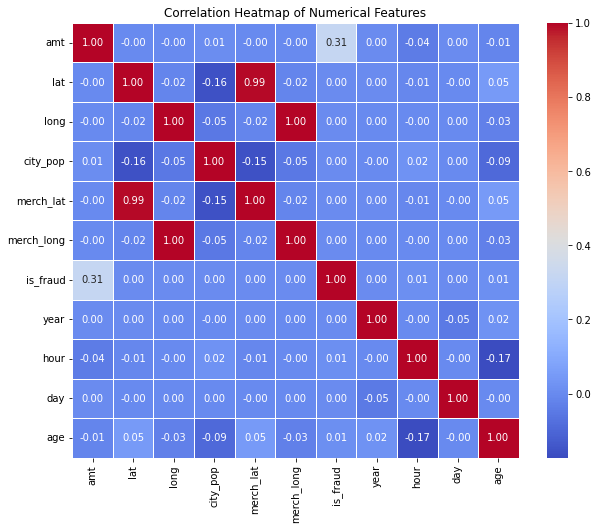

In [23]:
# Select all numerical columns in the DataFrame
numerical_features = dfn.select_dtypes(include=['int32','int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = dfn[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


**Encoding and Scaling**

In [26]:
# dropping unnecessary features
dfn.drop(columns=['merch_long','merch_lat','year','day'], 
        inplace=True)
dfn.head()

<ipython-input-26-206a597c63bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn.drop(columns=['merch_long','merch_lat','year','day'],


,merchant,category,amt,gender,lat,long,city_pop,job,is_fraud,network,hour,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.08,-81.18,3495,"Psychologist, counselling",0,Mastercard,0,31
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.89,-118.21,149,Special educational needs teacher,0,Unknown,0,41
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.18,-112.26,4154,Nature conservation officer,0,Unknown,0,57
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.23,-112.11,1939,Patent attorney,0,JCB,0,52
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.42,-79.46,99,Dance movement psychotherapist,0,American Express,0,33


In [27]:
#One-hot encoding and Label encoding for categorical data 
from sklearn.preprocessing import LabelEncoder

# Label encode high-cardinality categorical columns
label_encoder = LabelEncoder()
dfn['merchant'] = label_encoder.fit_transform(dfn['merchant'])
dfn['job'] = label_encoder.fit_transform(dfn['job'])
# df['network'] = label_encoder.fit_transform(df['network'])

# One-hot encode limited unique categorical columns
dfn = pd.get_dummies(dfn, columns=['category', 'gender','network'], drop_first=True)

#-------------------------------------------------------------------------------
# Scaling Numerical Data
from sklearn.preprocessing import StandardScaler

# Select numerical columns to scale
numeric_columns = ['amt', 'lat', 'long', 'city_pop', 'age','hour']
scaler = StandardScaler()
dfn[numeric_columns] = scaler.fit_transform(dfn[numeric_columns])

<ipython-input-27-5a0fee98ca50>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['merchant'] = label_encoder.fit_transform(dfn['merchant'])
<ipython-input-27-5a0fee98ca50>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['job'] = label_encoder.fit_transform(dfn['job'])


<h1 style="text-align: left;">Part 2: Model Building</h1>

Missing Data: The only feature with missing data was 'merch_zipcode'. However, since we dropped it we no longer have any missing data in this set.

In [28]:
pd.options.display.precision = 4  # Set to desired number of decimal places

**Datset**

In [29]:
dfn.head()

,merchant,amt,lat,long,city_pop,job,is_fraud,hour,age,category_food_dining,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,network_Diners Club,network_Discover,network_JCB,network_Mastercard,network_Unknown,network_Visa
0,514,-0.57,-0.48,0.66,-0.28,370,0,-1.88,-0.86,False,...,False,False,False,False,False,False,False,True,False,False
1,241,0.34,2.04,-2.03,-0.29,428,0,-1.88,-0.29,False,...,False,False,False,False,False,False,False,False,True,False
2,390,1.35,0.72,-1.60,-0.28,307,0,-1.88,0.63,False,...,False,False,False,True,False,False,False,False,True,False
3,360,-0.21,1.52,-1.59,-0.29,328,0,-1.88,0.34,False,...,False,False,False,True,False,False,True,False,False,False
4,297,-0.24,-0.02,0.78,-0.29,116,0,-1.88,-0.75,False,...,False,False,False,True,False,False,False,False,False,False


**Algorithm Selection**

We selected four algorithms: Decision Tree, Logistic Regression, Random Forest, and Naive Bayes. 

Since this is a binary classification task to detect fraudulent transactions, these algorithms offer a good balance of interpretability, performance, and diversity in approach.
- Decision Tree: Provides an interpretable model that can capture complex patterns in the data without requiring feature scaling. It’s suitable for non-linear relationships.
- Logistic Regression: A simple and interpretable linear model that is effective with binary classification tasks and is relatively fast to train.
- Random Forest: An ensemble of decision trees, which reduces overfitting and typically improves prediction accuracy. It is useful for handling imbalanced classes when class weights are adjusted.
- Naive Bayes (Gaussian): A probabilistic classifier that assumes feature independence. It’s efficient and well-suited to high-dimensional datasets.

**Spliting the data for training**

We used an 80-20 split for training and testing data, with stratification based on the target variable (is_fraud). Stratification ensures that the distribution of the target classes (fraud vs. non-fraud) is maintained in both the training and testing sets. The random seed was set to 42 for reproducibility. This approach allows for sufficient data in the training set to learn patterns, while retaining a representative test set for unbiased evaluation.

In [30]:
from sklearn.model_selection import train_test_split

# Define features and target
X = dfn.drop(columns=['is_fraud'])
y = dfn['is_fraud']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


**Model Training**

Each model was initialized with a balanced class weight to address the class imbalance in the target variable. This adjustment gives more weight to the minority class (is_fraud=1).
For each model:
- Decision Tree: Initialized with class_weight='balanced'.
- Logistic Regression: Used class_weight='balanced' and set a maximum of 500 iterations to ensure convergence.
- Random Forest: Trained with 100 estimators (trees) and class_weight='balanced'.
- Naive Bayes: GaussianNB was used without additional parameters, as it doesn’t directly support class weights.

**Model Evaluation**

We used the classification_report function from sklearn.metrics, which provides precision, recall, and F1-score for each class, along with accuracy. Given the class imbalance in fraud detection, recall for the fraud class (1) is crucial, as it measures the model’s ability to correctly identify fraudulent cases. Precision, recall, and F1-score together provide insights into the trade-off between false positives and false negatives, which is important in fraud detection.

**Decision Tree**

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize and train
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257748
           1       0.82      0.80      0.81      1501

    accuracy                           1.00    259249
   macro avg       0.91      0.90      0.90    259249
weighted avg       1.00      1.00      1.00    259249



**Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression

# Initialize and train
lr_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93    257748
           1       0.03      0.75      0.06      1501

    accuracy                           0.87    259249
   macro avg       0.52      0.81      0.50    259249
weighted avg       0.99      0.87      0.93    259249



**Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257748
           1       0.97      0.76      0.86      1501

    accuracy                           1.00    259249
   macro avg       0.99      0.88      0.93    259249
weighted avg       1.00      1.00      1.00    259249



**Naive Bayes**

In [34]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96    257748
           1       0.05      0.72      0.09      1501

    accuracy                           0.92    259249
   macro avg       0.52      0.82      0.53    259249
weighted avg       0.99      0.92      0.95    259249



**The Full Training Code**

In [35]:
from sklearn.model_selection import train_test_split

# Define features and target
X = dfn.drop(columns=['is_fraud'])
y = dfn['is_fraud']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#---------------------------------------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize and train
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
#---------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression

# Initialize and train
lr_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
#---------------------------------------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

#---------------------------------------------------------------------------------------------------
from sklearn.naive_bayes import GaussianNB

# Initialize and train
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257748
           1       0.82      0.80      0.81      1501

    accuracy                           1.00    259249
   macro avg       0.91      0.90      0.90    259249
weighted avg       1.00      1.00      1.00    259249



C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.93    257748
           1       0.03      0.75      0.06      1501

    accuracy                           0.87    259249
   macro avg       0.52      0.81      0.50    259249
weighted avg       0.99      0.87      0.93    259249

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257748
           1       0.97      0.76      0.86      1501

    accuracy                           1.00    259249
   macro avg       0.99      0.88      0.93    259249
weighted avg       1.00      1.00      1.00    259249

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96    257748
           1       0.05      0.72      0.09      1501

    accuracy                           0.92    259249
   macro a

**Performance Analysis**

**Decision Tree**
-  Precision (Class 1): 0.82
-  Recall (Class 1): 0.80
-  F1 Score (Class 1): 0.81

Interpretation: The Decision Tree model achieved strong results in detecting fraud, with an F1 score of 0.81 for the fraud class (1). This model performs well on both precision and recall, indicating a balanced ability to correctly identify fraud without excessive false positives. However, decision trees can sometimes overfit, particularly on training data, so further validation (like cross-validation) may be necessary to confirm generalizability.

**Logistic Regression**
-  Precision (Class 1): 0.03
-  Recall (Class 1): 0.75
-  F1 Score (Class 1): 0.06

Interpretation: Logistic Regression performs poorly in precision for the fraud class, meaning it classifies many non-fraud cases as fraud (high false-positive rate). While it has a high recall (0.75), its F1 score is very low due to the poor precision. In the context of fraud detection, this model’s performance may lead to an unmanageable number of false positives, which would be problematic in a real-world scenario.

**Random Forest**
- Precision (Class 1): 0.97
- Recall (Class 1): 0.76
- F1 Score (Class 1): 0.86

Interpretation: Random Forest achieves the highest F1 score (0.86) among the models for the fraud class. With excellent precision and a decent recall, this model minimizes false positives and captures a substantial portion of fraud cases. This balance makes it one of the best choices for fraud detection in this dataset. Random Forest models tend to generalize well while handling class imbalance effectively, especially when class weights are used.

**Naive Bayes**
- Precision (Class 1): 0.05
- Recall (Class 1): 0.72
- F1 Score (Class 1): 0.09

Interpretation: The Naive Bayes model shows similar weaknesses to Logistic Regression, with low precision and moderate recall for the fraud class. Its high recall means it captures many fraud cases, but the very low precision could lead to too many false positives. Given this low F1 score, it’s less effective for fraud detection, as it doesn’t provide the necessary balance between precision and recall.

**Improving the Model**

To enhance the performance of our initial individual models (Decision Tree, Logistic Regression, Random Forest, and Naive Bayes), we implemented an Ensemble Voting Classifier. This approach combines predictions from multiple models to make a more robust overall prediction. Specifically, we used a soft voting ensemble, where each model's predicted probabilities for each class are averaged, and the class with the highest average probability is chosen.

In [41]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Define features and target
X = dfn.drop(columns=['is_fraud']) 
y = dfn['is_fraud']

# Split the data into training and testing sets (stratify by target for balanced class distribution in train and test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Optional: Scale numerical features (Logistic Regression can benefit from scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize individual models with class weight to handle imbalance
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Create the Voting Classifier with soft voting
voting_clf = VotingClassifier(
    estimators=[('Logistic Regression', log_reg), ('Decision Tree', dt), ('Random Forest', rf)],
    voting='soft'  # 'soft' voting to consider predicted probabilities
)

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_voting = voting_clf.predict(X_test)

# Display classification report
print("Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))


Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257748
           1       0.90      0.80      0.85      1501

    accuracy                           1.00    259249
   macro avg       0.95      0.90      0.92    259249
weighted avg       1.00      1.00      1.00    259249



Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257748
           1       0.90      0.80      0.85      1501

    accuracy                           1.00    259249
   macro avg       0.95      0.90      0.92    259249
weighted avg       1.00      1.00      1.00    259249



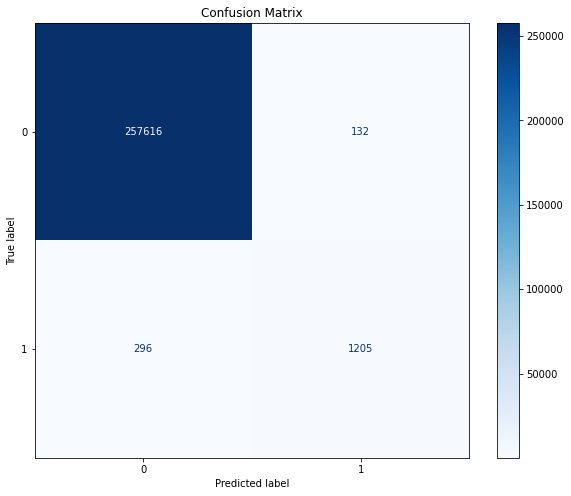

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))
cm = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(10, 8))
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_clf.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())  # Optional: Choose a color map
plt.title("Confusion Matrix")
plt.show()

**Model Validation**

In [42]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import StandardScaler

# Define features and target
X = dfn.drop(columns=['is_fraud'])
y = dfn['is_fraud']

# Initialize individual models with class weight for imbalance handling
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Create the Voting Classifier with soft voting
voting_clf = VotingClassifier(
    estimators=[('Logistic Regression', log_reg), ('Decision Tree', dt), ('Random Forest', rf)],
    voting='soft'
)

# Initialize StratifiedKFold for cross-validation with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define a scorer for cross-validation (e.g., F1-score)
scorer = make_scorer(f1_score, pos_label=1)

# Perform cross-validation and compute average score
cross_val_scores = cross_val_score(voting_clf, X, y, cv=skf, scoring=scorer)

# Display cross-validation results
print("Cross-Validation F1 Scores:", cross_val_scores)
print("Average F1 Score:", cross_val_scores.mean())


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation F1 Scores: [0.85573192 0.85734564 0.85936396 0.85473092 0.86803105]
Average F1 Score: 0.8590406969519286


**Cross-Validation Analysis:**
Individual F1 Scores: The F1 scores for each fold range from approximately 0.8547 to 0.8680. This indicates that the model maintains a relatively consistent performance across different subsets of the data, showing robustness and low variance.
Average F1 Score: The average F1 score across all folds is approximately 0.8590. This metric represents the harmonic mean of precision and recall and gives a balanced view of the model’s performance, particularly for imbalanced datasets like fraud detection.

**Interpretation in the Context of Fraud Detection:**
In fraud detection, both false positives (non-fraud cases predicted as fraud) and false negatives (fraud cases predicted as non-fraud) have consequences, but false negatives are generally more critical. An F1 score is useful here because it balances both precision and recall, and this cross-validation result suggests that the model has a balanced approach to these metrics.

**Final Model Selection**

We will be going with the ensembled model as it has shown the best performance across all metrics

# Part 3: Visualization of Results

**Feature Importance**

Voting Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257748
           1       0.90      0.80      0.85      1501

    accuracy                           1.00    259249
   macro avg       0.95      0.90      0.92    259249
weighted avg       1.00      1.00      1.00    259249



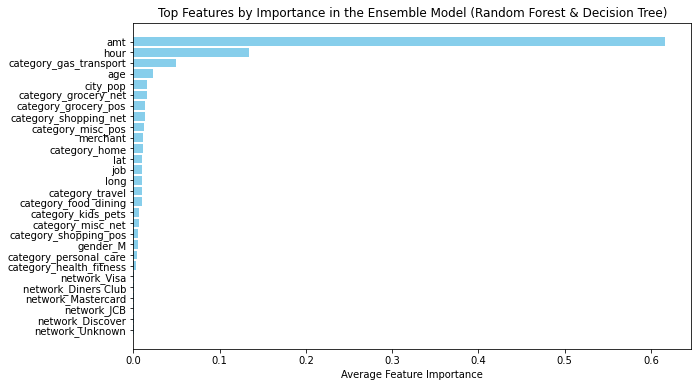

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define features and target
X = dfn.drop(columns=['is_fraud'])  
y = dfn['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Optional: Scale numerical features (for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize individual models
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Fit the Decision Tree and Random Forest on the training data to get feature importances
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Create the Voting Classifier with soft voting
voting_clf = VotingClassifier(
    estimators=[('Logistic Regression', log_reg), ('Decision Tree', dt), ('Random Forest', rf)],
    voting='soft'
)

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_voting = voting_clf.predict(X_test)

# Display classification report (optional)
from sklearn.metrics import classification_report
print("Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))

# Extract feature importances and plot them
feature_names = X.columns
importances = np.zeros(len(feature_names))

# Add feature importances from Decision Tree model
importances += dt.feature_importances_

# Add feature importances from Random Forest model
importances += rf.feature_importances_

# Average the feature importances
importances /= 2

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Average Feature Importance")
plt.title("Top Features by Importance in the Ensemble Model (Random Forest & Decision Tree)")
plt.show()


'amt' has the most significant impact on the performance of the model, it is also the the feature with the highest correlation with the target value

**Model Performance Across Features**

In [53]:
# Define the feature to analyze
feature_to_analyze = 'amt'  # Example: analyzing the "amt" feature
thresholds = [10, 500, 1000, 2000]  # Define thresholds to create subsets

performance_data = []
for threshold in thresholds:
    # Check if X_test is a DataFrame; if not, use array indexing
    if isinstance(X_test, pd.DataFrame):
        subset = X_test[X_test[feature_to_analyze] <= threshold]
        subset_labels = y_test[subset.index]
    else:  
        feature_index = list(X.columns).index(feature_to_analyze)  # Get index of feature in the numpy array
        subset_indices = X_test[:, feature_index] <= threshold
        subset = X_test[subset_indices]
        subset_labels = y_test[subset_indices]

    # Evaluate model on this subset
    y_pred_subset = voting_clf.predict(subset)  
    f1 = f1_score(subset_labels, y_pred_subset)
    performance_data.append((threshold, f1))

# Display the performance data
for threshold, f1 in performance_data:
    print(f"Threshold: {threshold}, F1 Score: {f1}")


Threshold: 10, F1 Score: 0.8488082532906439
Threshold: 500, F1 Score: 0.8491895701198027
Threshold: 1000, F1 Score: 0.8491895701198027
Threshold: 2000, F1 Score: 0.8491895701198027


We can see that even after changing the threshold for 'amt', there was no significant change in the performance